### Title: 
# k-nearest neighbors

### Description:

KNN classifies the new data points based on the similarity measure of the earlier stored data points. For example, if we have a dataset of tomatoes and bananas. KNN will store similar measures like shape and color. When a new object comes it will check its similarity with the color (red or yellow) and shape.

In this notebook, we will perform the KNN algorithm from the scikit-learn package and plot the confussion matrix.

### Authors:
#### Hugo Cesar Octavio del Sueldo
#### Jose Lopez Galdon

### Date:
11/12/2020

### Version:
2.0

***

### Libraries

In [1]:
    # Numpy & Pandas to work with the DF
import numpy as np
import pandas as pd

    # Seaborn / matplotlib for graphs
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

    # Import Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import itertools
import scikitplot as skplt

    # Import pickle to save models
import pickle

### Functions

In [2]:
'''
This function prints and plots the confusion matrix:

cm = confussion_matrix using the prediction values
classes = name of the labels
cmap & tittle color map and tittle of the plot
'''
def plot_confusion_matrix(model_predictions, model_name, normalize=False): 
    cm = confusion_matrix(y_val, model_predictions, labels=[0, 1])
    classes=['Fully Pay', 'Non-payment']
    cmap = plt.cm.Reds
    title = f'{model_name} Confusion Matrix'
    fontsize = 12
    fontsize_lab = 15
    fontsize_tit = 20
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
        
        # Plot params
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = fontsize_tit)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=fontsize)
    plt.yticks(tick_marks, classes, fontsize=fontsize)
    
        # Itercool params
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label', fontsize=fontsize_lab)
    plt.xlabel('Predicted label', fontsize=fontsize_lab)

## Load data

In [3]:
    # To automate the work as much as possible, we will parameterize the codes, so in this case, we will create an objetct with
    # the path root
name = 'X_train'

X_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

name = 'Y_train'

y_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

name = 'X_val'

X_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

name = 'Y_val'

y_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

In [4]:
    # Transform to 1d array
y_train = np.ravel(y_train)

## KNN prediction

In [5]:
    # Train
knnreg = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knnreg.fit(X_train, y_train)

    # Predict with the test and calculate tha accuracy
y_pred = knnreg.predict(X_val)
print('Accuracy of KNN classifier on test set: {:.5f}'.format(knnreg.score(X_val, y_val)))

Accuracy of KNN classifier on test set: 0.73800


### Confussion Matrix

It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.

#### Non normalized

Here we have the confussion matrix with the absolute values...

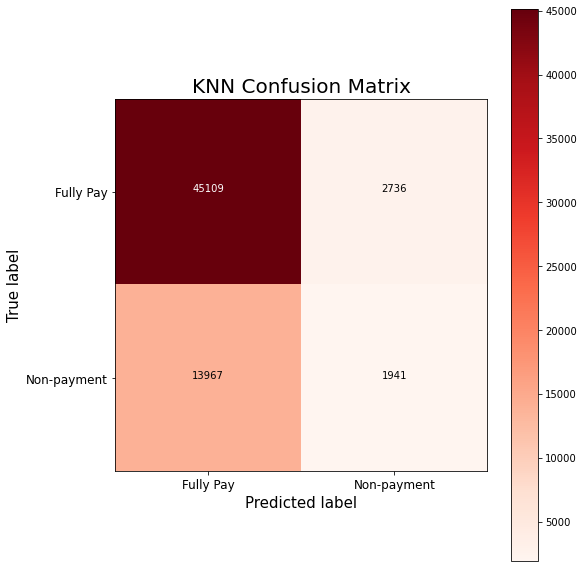

In [6]:
    # Set the size
plt.figure(figsize=(8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'KNN', normalize=False)
plt.show()

#### Normalized

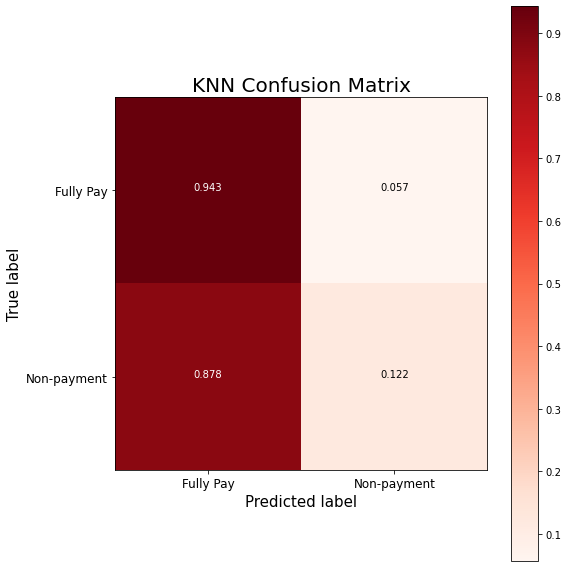

In [7]:
    # Set the size
plt.figure(figsize=(8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'KNN', normalize=True)
plt.show()

In this confussion matrix we can see that we are very good with the TP, but when we have to predict Non-payment customers the model is not as good as other algorithms.

### Classsification Report

In [8]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84     47845
           1       0.42      0.12      0.19     15908

    accuracy                           0.74     63753
   macro avg       0.59      0.53      0.52     63753
weighted avg       0.68      0.74      0.68     63753



We can see at the `classification_report` that our model predict good Fully Pay customers, because we have a 76% precision (remeber *Precision = TP/(TP + FP)*) and therefore our recall (*Recall = TP/(TP+FN)*) is almost 100% this makes that the f1-score (*F1 Score = 2·(Recall · Precision) / (Recall + Precision)*) is 84%.

On the other hand, as we said above the model is very poor predicting Non-payment clients. The main issue is that the recall is very low, that means we can not detect all the Non-payment, in other words, we have a bigger amount of *False Positives*.

### ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

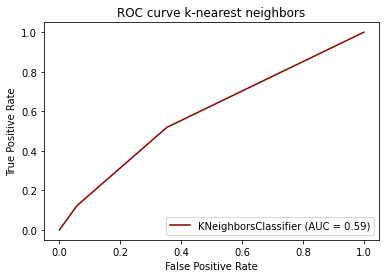

In [9]:
    # Parametrize
classifier = knnreg

disp = metrics.plot_roc_curve(classifier, X_val, y_val, color='#8B0000')

    # Set title
disp.ax_.set_title('ROC curve k-nearest neighbors');

In this case our Roc Curve is very poor because is near to 0.5, si this model will be drop for the final test.

### Cumulative gains curve

The cumulative gains curve is an evaluation curve that assesses the performance of the model and compares the results with the random pick. It shows the percentage of targets reached when considering a certain percentage of the population with the highest probability to be target according to the model.

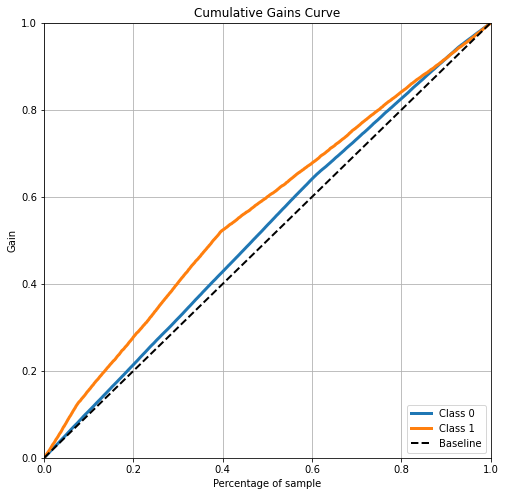

In [11]:
    # Deriving Class probabilities
predicted_probabilities = knnreg.predict_proba(X_val)

    # Creating the plot
skplt.metrics.plot_cumulative_gain(y_val, predicted_probabilities, figsize=(8,8));

With the knn classifier if we analyze the 50% of the clients we will obtain more than a 60% certainty, this is interisting if the company has to audit the clients only needs the 50% of the clients to reach the 60%. But as we can see, this is not a good metric...

### Lift curve

In addition to the cumulative gains curve, the lift curve is a widely used visualization of model performance. In definitive terms, the lift is a measure of the performance of a targeting model at predicting or classifying cases as having an enhanced response (for the population as a whole), measured against a random choice targeting model. Constructing a lift curve follows a similar process as forming the cumulative gain curve. Indeed, it is derived from the gain chart. First, we order observations on the horizontal axis with the highest probability of being a target on the left and vice versa for the right-hand side. On the vertical axis, the lift curve indicates how many times more than average targets are included in this group. Lift is calculated as the ratio of Cumulative Gains from classification and random models.

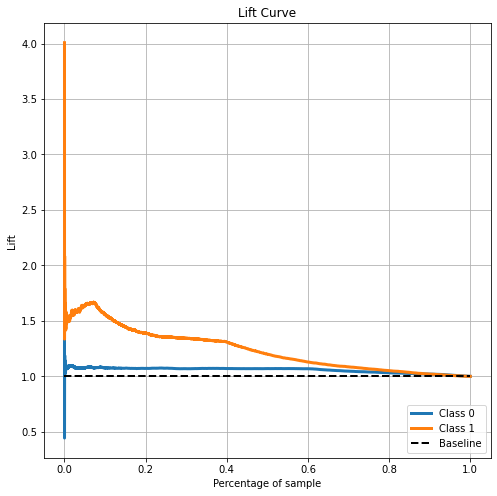

In [12]:
    # Plot the lift curve
skplt.metrics.plot_lift_curve(y_val, predicted_probabilities, figsize=(8,8));

As we said before, we can see that there is no difference between the targets at 50-60% so this model is classifing very bad. This is due to a bad recall and a poor precission.

In [13]:
    # Parametrize
model = knnreg
filename = "knn.sav"

    # Save the model
pickle.dump(model, open(filename, 'wb'))